# (4.1) K-Means - Auswahl der Clusteranzahl <span style="color:orange; font-size:1em">(oo)</span>

In dieser Aufgabe lernen Sie eine Möglichkeit kennen, für den K-Means Algorithmus die Anzahl der zu suchenden Clusterzentren $K$ (oder auch für andere Clusteralgorithmen deren Hyperparameter) zu bestimmen.

Zur Illustration des Problems und zum Lösen der Aufgabe verwenden wir denselben Datensatz, der von Scikit-Learn zur Illustration der Silhouetten-Analyse verwendet wird. Das entsprechende Tutorial finden Sie hier: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html.

**<span style="color:green; font-size:2em"> (a) </span>** Erzeugen Sie den Datensatz wie unten angegeben und plotten Sie. Was ist die Schwierigkeit an diesem Datensatz im Hinblick auf eine Clusteranalyse?

**<span style="color:orange; font-size:2em"> (b) </span> (Optional)** Machen Sie sich mit dem Code auf https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html vertraut. Zusätzliche Erklärungen zur Silhouetten-Analyse finden Sie außerdem hier: https://scikit-learn.org/stable/modules/clustering.html im Kapitel **2.3.10.5. Silhouette Coefficient**.

**<span style="color:orange; font-size:2em"> (c) </span> (Optional)** Machen Sie sich mit der Elbow-Methode vertraut. Zum Beispiel durch dieses Video: https://www.youtube.com/watch?v=QXOkPvFM6NU. 

**<span style="color:green; font-size:2em"> (d) </span>** Untersuchen Sie den Datensatz qualitativ im Hinblick auf die Anzahl der Clusterzentren. Varieren Sie dazu den Parameter `n_clusters` von $2-6$ und plotten Sie jeweils das Ergebnis. Interpretieren Sie.

**<span style="color:red; font-size:2em"> (e) </span>** Für die Auswahl der korrekten Anzahl ist eine quantitative Untersuchung nötig. Verwenden Sie hier ein Verfahren, dass auf der Benutzung eines Validierungsdatensatzes beruht. Gehen Sie so vor:

*(i)*  Iterieren Sie über die Clusteranzahlen $K=\{2, 3, 4, 5, 6\}$.

*(ii)* Teilen Sie den Datensatz $10-20$-mal zufällig in einen Trainingsdatensatz und einen Validierungsdatensatz. Weisen Sie z.B. jeweils 50% der Daten dem Trainingsdatensatz zu. Iterieren Sie über die Datensätze, das heißt über die jeweils aus Trainings- und Validierungsdaten bestehenden Sets.

*(iii)* Trainieren Sie für jeden Split aus dem vorherigen Teil und den entsprechenden Wert $K$ den K-Means-Algorithmus. Mit der Funktion `predict` können Sie nun neben der Clusterzugehörigkeit der Trainingsdaten auch die Clusterzugehörigkeit ungesehener Daten vorhersagen. Sagen Sie so die Clusterzugehörigkeit der Validierungsdaten des aktuellen Splits vorher.

*(iv)* Trainieren Sie nun einen Validierungs-K-Means auf den Validierungsdaten. Sagen Sie mit diesem Validierungs-K-Means die Clusterzugehörigkeit der Validierungsdaten vorher.

*(v)* Wenn die Anzahl der Clusterzentren richtig gewählt ist, dann sollten sich die Vorhersagen des Validierungs-K-Means (der die Validierungsdaten gesehen hat) und des Trainings-K-Means (der die Validierungsdaten ungesehen vorhergesagt hat) im Wesentlichen gleichen, denn das Ergebnis sollte in beiden Fällen dasselbe sein. Wenn die Anzahl allerdings falsch gewählt ist, dann können durch die Zufälligkeit der Daten in den beiden Fällen unterschiedliche Zuordnungen entstehen. Vergleichen Sie also die Vorhersage des Validierungs-K-Means mit der des Trainings-K-Means. Verwenden Sie dafür `adjusted_rand_index` oder `adjusted_mutual_info` aus dem Modul `sklearn.metrics` die ähnlich funktionieren wie `accuracy_score` aus demselben Modul. Informieren Sie sich alternativ über andere Evaluationsmetriken auf https://scikit-learn.org/stable/modules/clustering.html ab **2.3.10. Clustering performance evaluation**. Warum kann nicht einfach `accuracy_score` verwendet werden?

*(vi)* Berechnen Sie nun den durchschnittlichen von Ihnen gewählten Score über alle Splits hinweg für jeden Wert $K$. Plotten Sie den durchschnittlichen Score gegen die Werte für $K$. Interpretieren Sie das Ergebnis.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mutual_info_score, adjusted_mutual_info_score, adjusted_rand_score

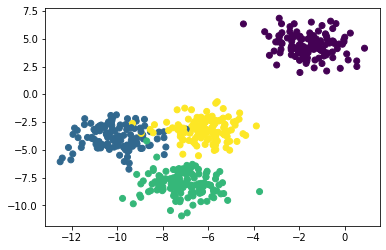

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
range_n_clusters = [2, 3, 4, 5, 6]
r_repeats = 20

In [6]:
scores = np.zeros((len(range_n_clusters), r_repeats))

In [7]:
for i, n_clusters in enumerate(range_n_clusters):
    
    clusterer = KMeans(n_clusters=n_clusters)
    
    for r in range(r_repeats):
        X_train, X_test = train_test_split(X, train_size=0.8)
        
        clusterer.fit(X_train)
        labels_pred = clusterer.predict(X_test)
        
        clusterer.fit(X_test)
        labels_test = clusterer.predict(X_test)
        
        score = adjusted_mutual_info_score(labels_pred, labels_test)
        
        scores[i, r] = score
        
        

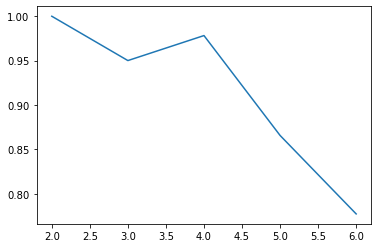

In [8]:
plt.plot(range_n_clusters, scores.mean(axis=1))